# WEEK 0 Project on sierraleone dataset


## Importing the datas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from windrose import WindroseAxes


## Read the data 


In [2]:
# NOTE: u should use the full path 
data = pd.read_csv(r"C:\Users\doff n\Desktop\doffneri\week0\src\data\sierraleone-bumbuna.csv")

In [3]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
data.shape

(525600, 19)

In [5]:

data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [6]:
print(data.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


## Missing Values

In [7]:
print(data.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


# Check for negative values in GHI, DNI, and DHI

In [8]:
for col in ['GHI', 'DNI', 'DHI']:
    neg_count = (data[col] < 0).sum()
    print(f"Negative values in {col}: {neg_count}")

Negative values in GHI: 261135
Negative values in DNI: 266352
Negative values in DHI: 263128


## Basic statistics to spot potential issues

In [9]:
print("\nBasic statistics:")
print(data.describe())


Basic statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.

## Define function to detect outliers

In [10]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'RH', 'BP']

for col in columns_to_check:
    outliers = detect_outliers(data, col)
    print(f"\nOutliers in {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[col].describe())


Outliers in GHI: 15853
count    15853.000000
mean      1007.290292
std         88.389577
min        911.000000
25%        939.000000
50%        980.000000
75%       1054.000000
max       1499.000000
Name: GHI, dtype: float64

Outliers in DNI: 101688
count    101688.000000
mean        530.708371
std         154.367505
min         268.000000
25%         405.300000
50%         525.600000
75%         642.400000
max         946.000000
Name: DNI, dtype: float64

Outliers in DHI: 4407
count    4407.000000
mean      617.256546
std        42.352427
min       567.500000
25%       585.700000
50%       606.000000
75%       638.050000
max       892.000000
Name: DHI, dtype: float64

Outliers in ModA: 21017
count    21017.000000
mean       979.322244
std         78.086219
min        898.800000
25%        922.000000
50%        955.000000
75%       1012.000000
max       1507.000000
Name: ModA, dtype: float64

Outliers in ModB: 20613
count    20613.000000
mean       949.283607
std         81.125148
min

## Visualize distributions to spot anomalies

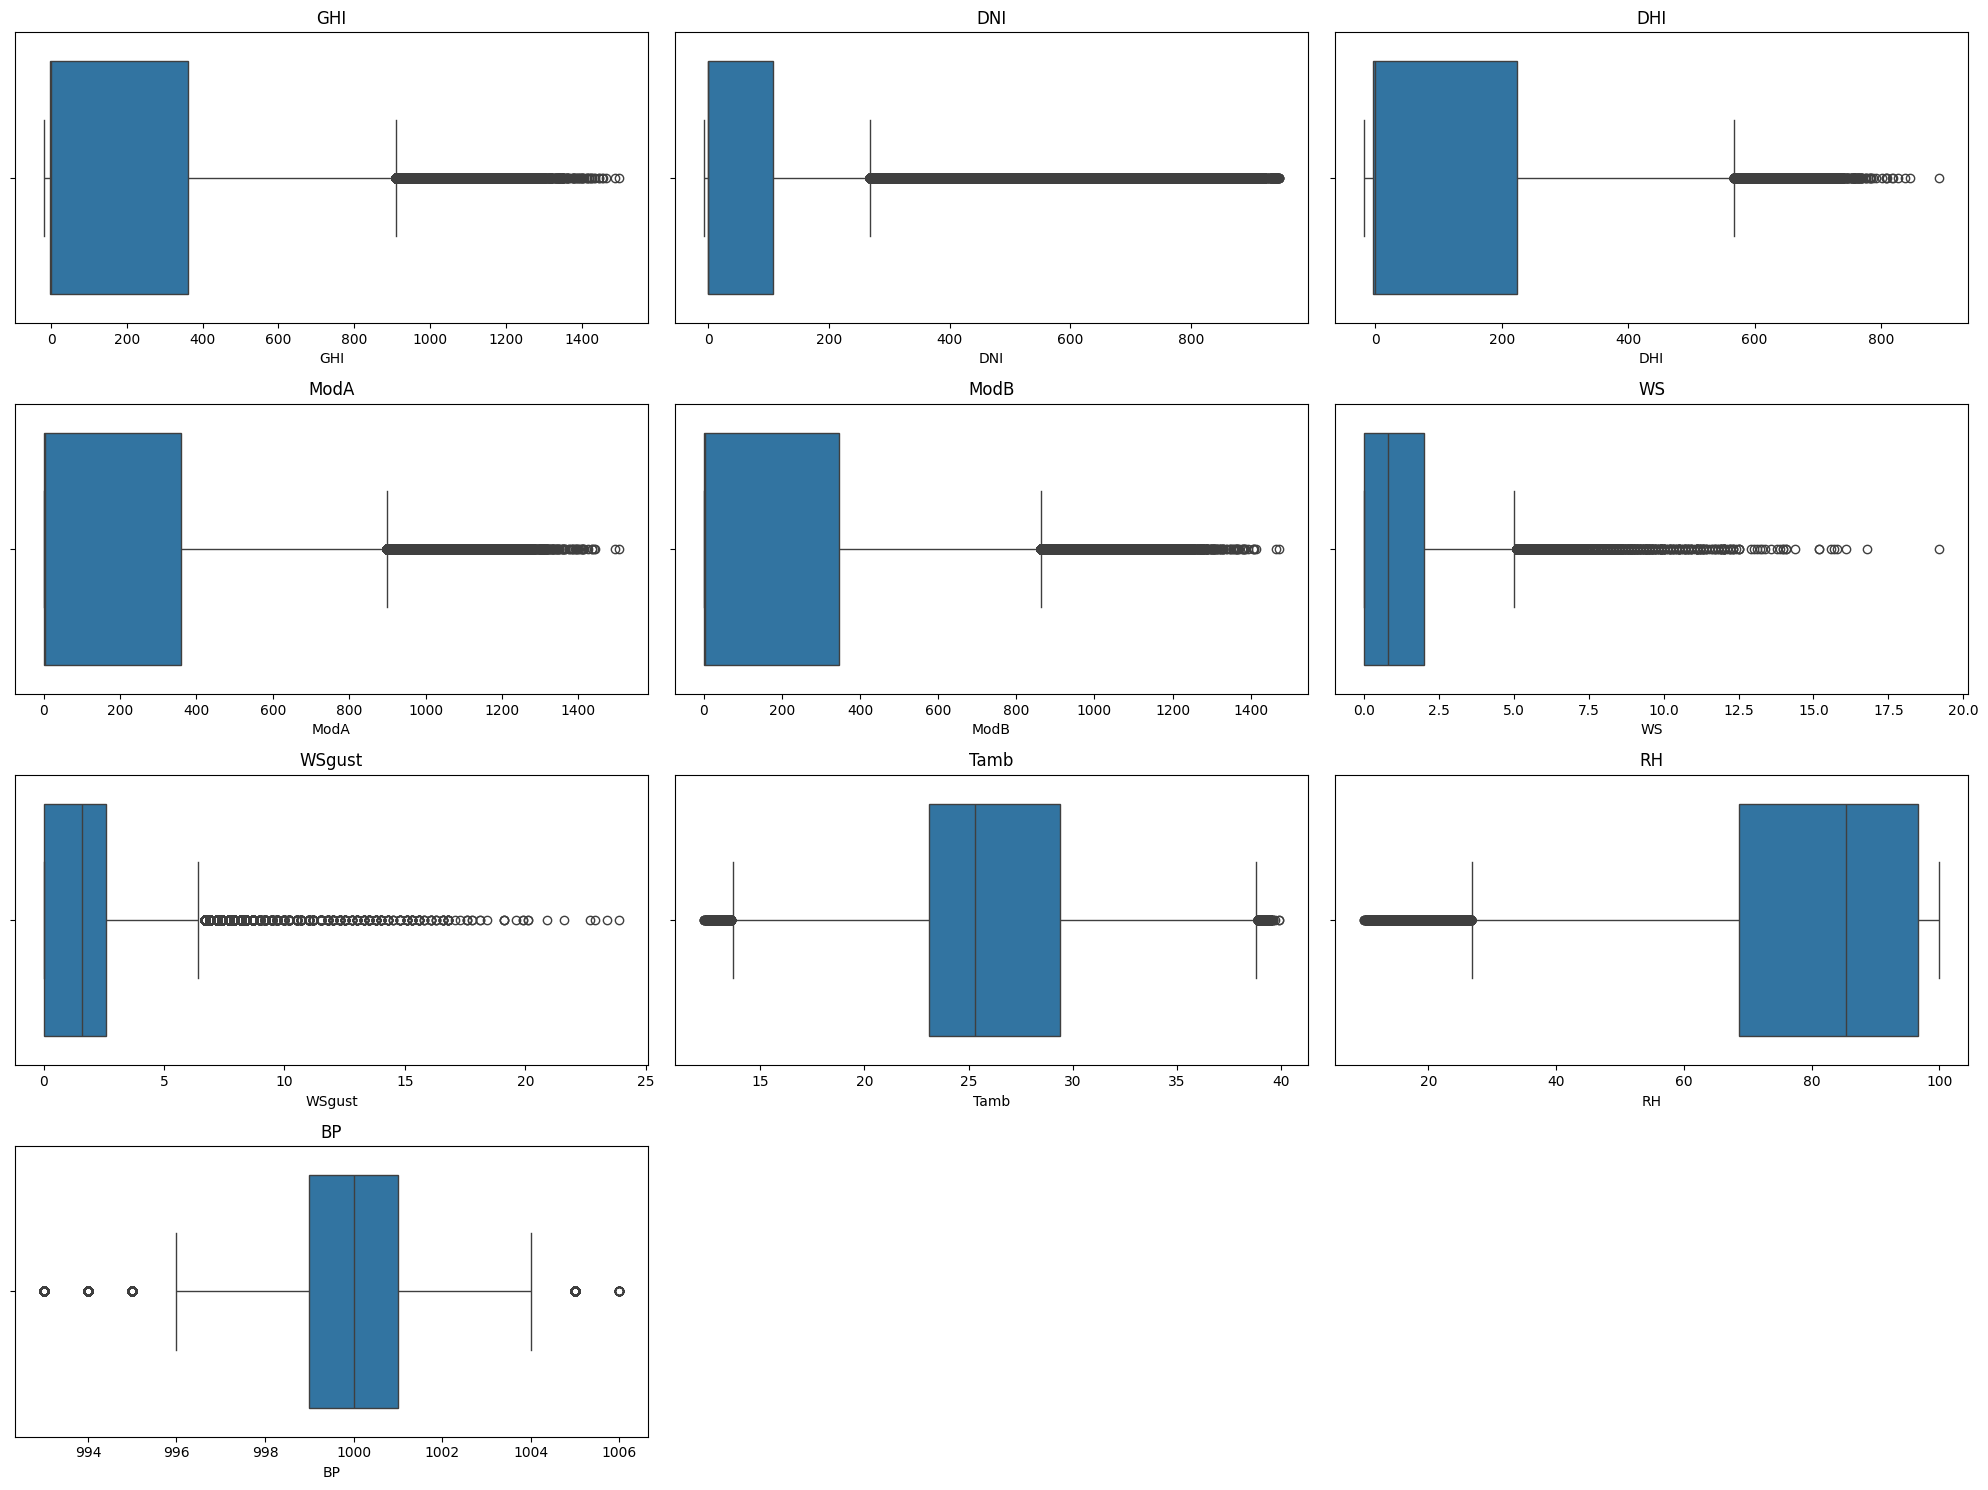

In [11]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##  Check for impossible or unlikely values

In [12]:
print("Checking for impossible or unlikely values:")
print("Negative wind speed:", (data['WS'] < 0).sum())
print("Wind speed > 100 m/s:", (data['WS'] > 100).sum())
print("GHI > 1361 W/m^2 (solar constant):", (data['GHI'] > 1361).sum())
print("Relative Humidity > 100%:", (data['RH'] > 100).sum())
print("Relative Humidity < 0%:", (data['RH'] < 0).sum())
print("Barometric Pressure < 800 hPa:", (data['BP'] < 800).sum())
print("Barometric Pressure > 1100 hPa:", (data['BP'] > 1100).sum())

Checking for impossible or unlikely values:
Negative wind speed: 0
Wind speed > 100 m/s: 0
GHI > 1361 W/m^2 (solar constant): 41
Relative Humidity > 100%: 0
Relative Humidity < 0%: 0
Barometric Pressure < 800 hPa: 0
Barometric Pressure > 1100 hPa: 0


# Check for consistency between related variables

In [13]:
print("\nChecking consistency:")
print("GHI < DNI + DHI (should be very rare):", (data['GHI'] < data['DNI'] + data['DHI']).sum())
print("ModA or ModB > GHI (should be rare):", ((data['ModA'] > data['GHI']) | (data['ModB'] > data['GHI'])).sum())


Checking consistency:
GHI < DNI + DHI (should be very rare): 244259
ModA or ModB > GHI (should be rare): 414225


## Time series continuity check

In [14]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
time_diff = data['Timestamp'].diff()
print("\nTime gaps larger than expected:")
print(time_diff[time_diff > pd.Timedelta(minutes=1)])


Time gaps larger than expected:
Series([], Name: Timestamp, dtype: timedelta64[ns])


## Check for unusual differences between ModA and ModB

In [15]:
mod_diff = abs(data['ModA'] - data['ModB'])
large_diff = mod_diff[mod_diff > 50]  # Assuming a difference > 50 is unusual
print("\nLarge differences between ModA and ModB:")
print(large_diff.describe())


Large differences between ModA and ModB:
count    16192.000000
mean        76.231318
std         39.350022
min         50.000000
25%         56.800000
50%         65.800000
75%         79.000000
max        461.400000
dtype: float64


##  Check for unusual temperature differences

In [16]:
temp_diff = abs(data['Tamb'] - data['TModA'])
large_temp_diff = temp_diff[temp_diff > 10]  # Assuming a difference > 10°C is unusual
print("\nLarge differences between Tamb and TModA:")
print(large_temp_diff.describe())


Large differences between Tamb and TModA:
count    144003.000000
mean         19.593308
std           6.109298
min          10.000000
25%          14.400000
50%          19.200000
75%          24.100000
max          41.900000
dtype: float64


## Time Series Analysis

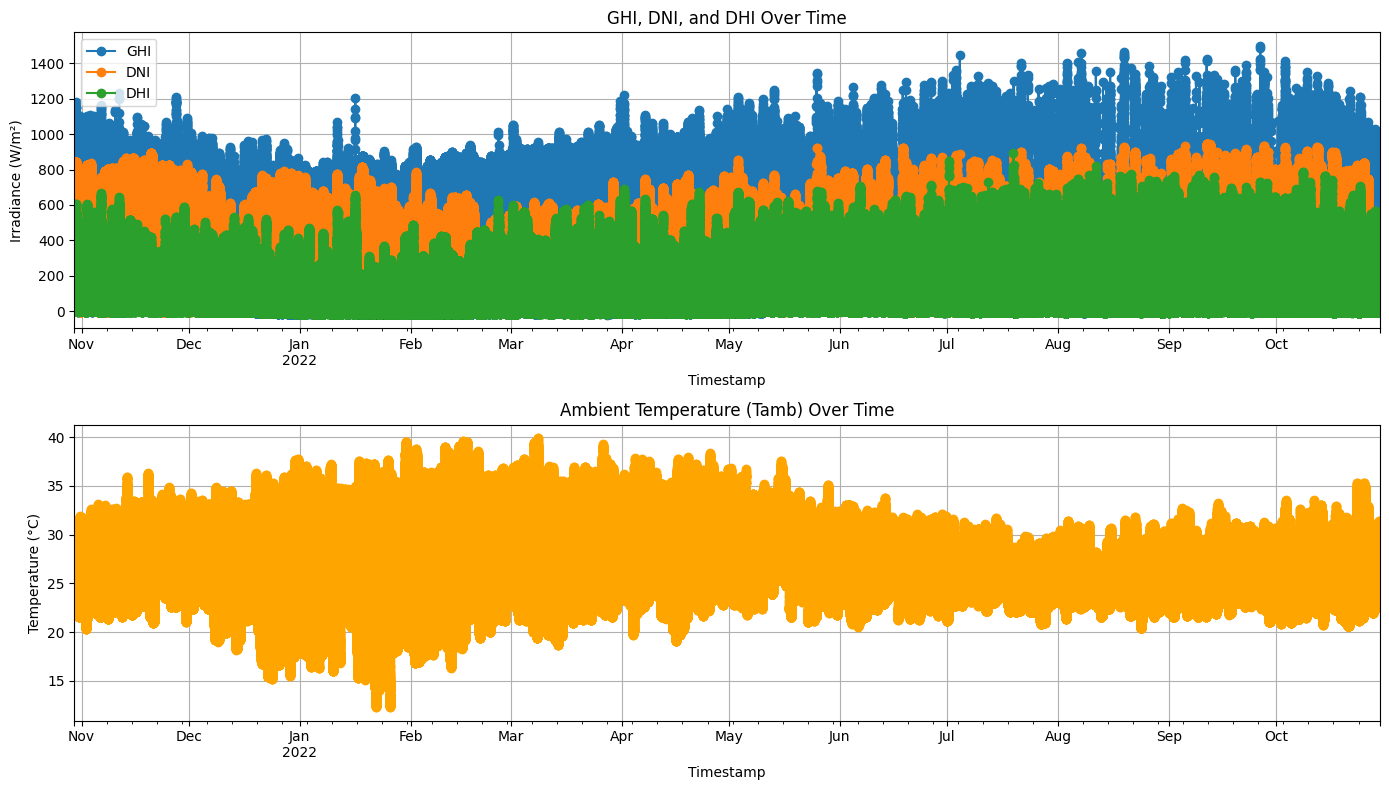

<Figure size 1000x600 with 0 Axes>

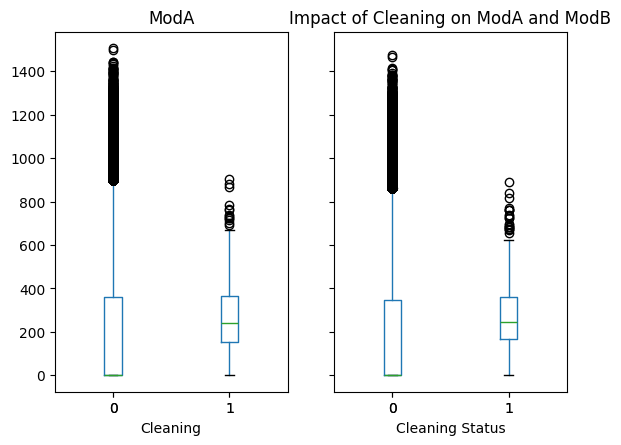

In [17]:
# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set 'Timestamp' as the index
data.set_index('Timestamp', inplace=True)

# Plot the time series for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(14, 8))

# Plotting GHI, DNI, DHI
plt.subplot(2, 1, 1)
data[['GHI', 'DNI', 'DHI']].plot(ax=plt.gca(), marker='o')
plt.title('GHI, DNI, and DHI Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.grid(True)

# Plotting Tamb
plt.subplot(2, 1, 2)
data['Tamb'].plot(ax=plt.gca(), color='orange', marker='o')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Impact of Cleaning on ModA and ModB
plt.figure(figsize=(10, 6))

# Plot ModA and ModB values grouped by Cleaning status
data.boxplot(column=['ModA', 'ModB'], by='Cleaning', grid=False)
plt.suptitle('')
plt.title('Impact of Cleaning on ModA and ModB')
plt.xlabel('Cleaning Status')
plt.ylabel('Sensor Reading')
plt.show()

## Correlation Analysis

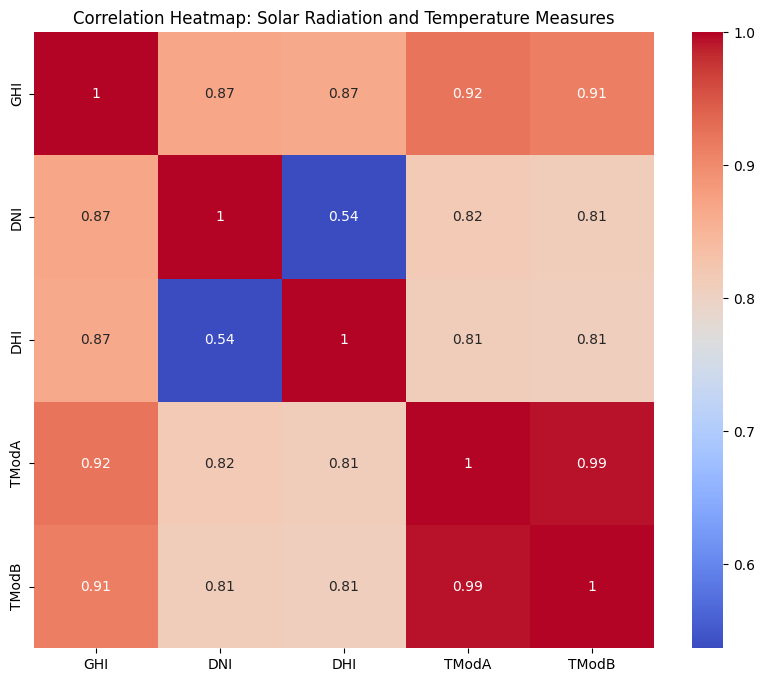

In [18]:
# Plot heatmap for correlation between GHI, DNI, DHI, TModA, and TModB
plt.figure(figsize=(10, 8))
sns.heatmap(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Solar Radiation and Temperature Measures')
plt.show()

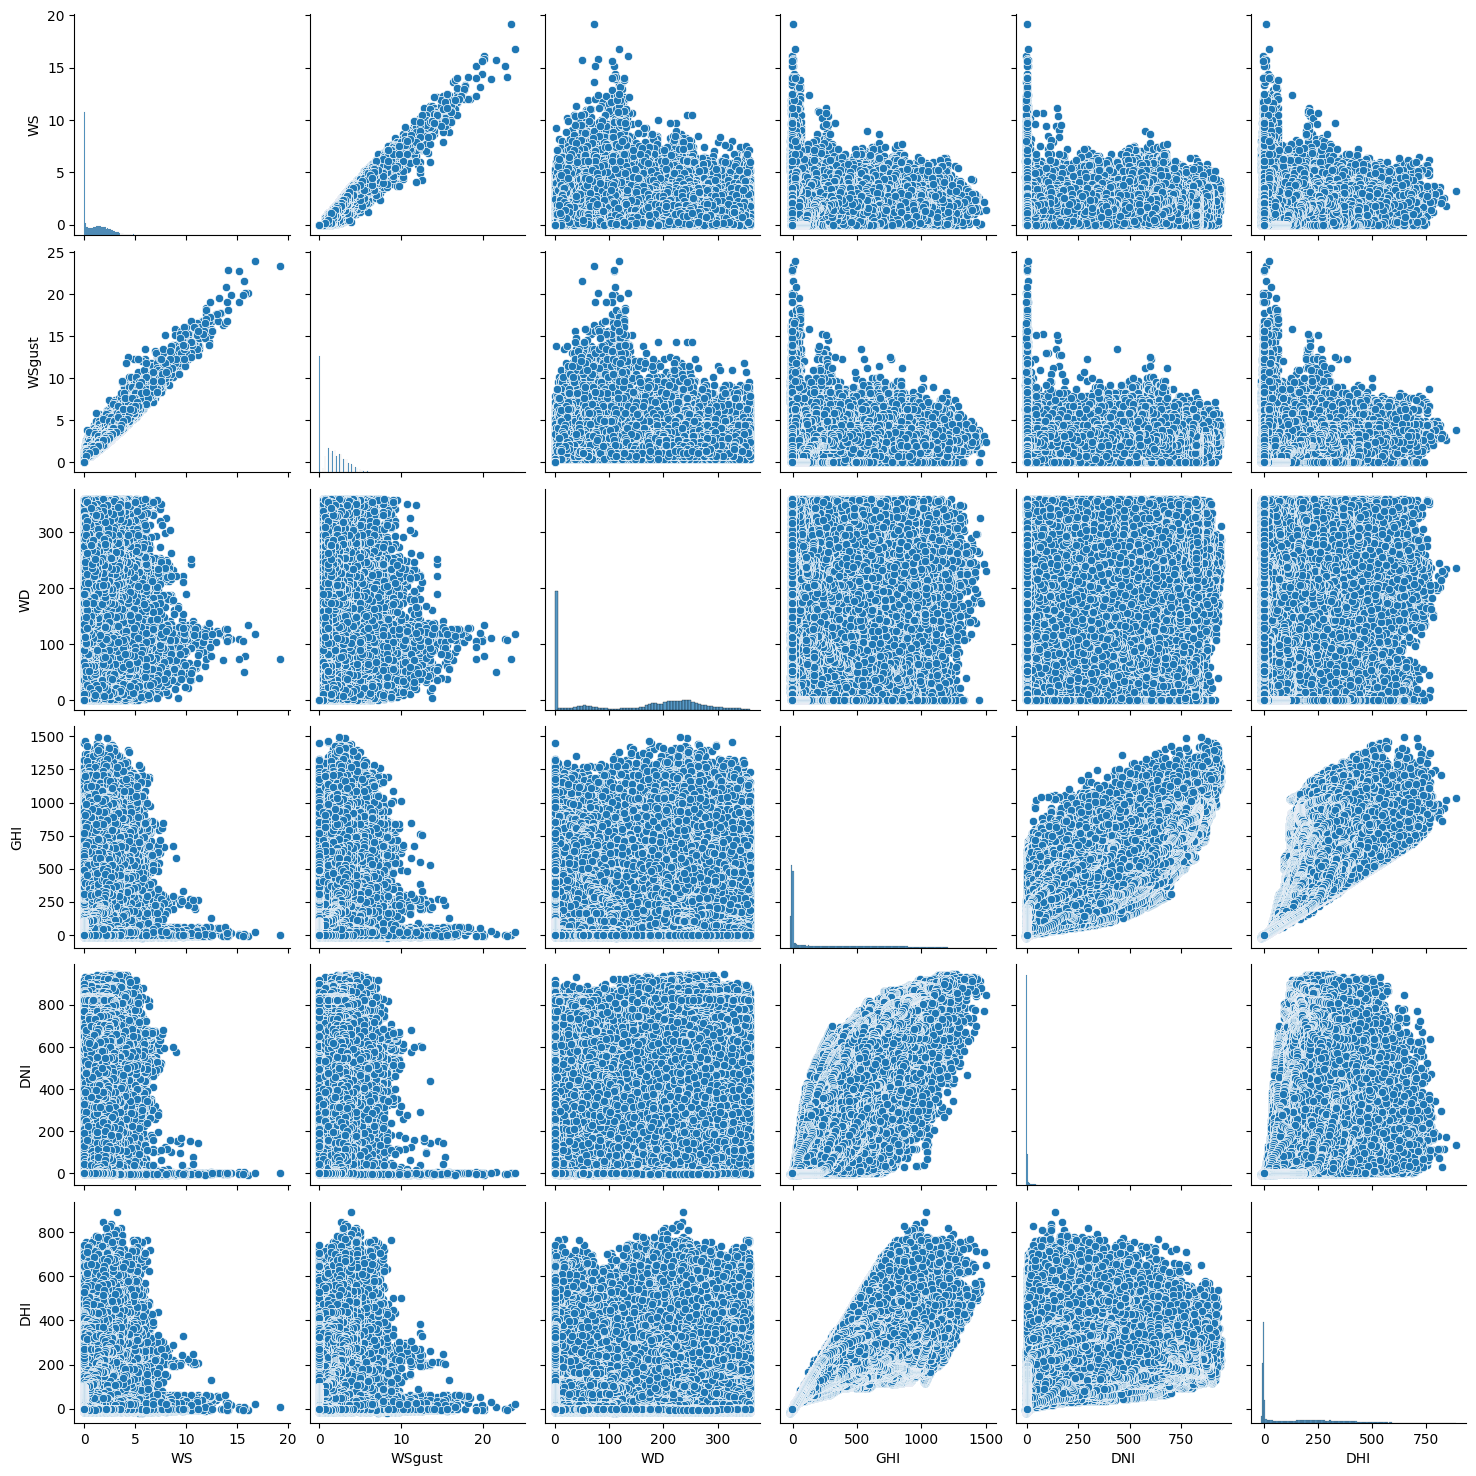

In [20]:
# Scatter plot matrix for wind conditions and solar irradiance
sns.pairplot(data[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']])
plt.show()

## Wind Analysis: Polar plots

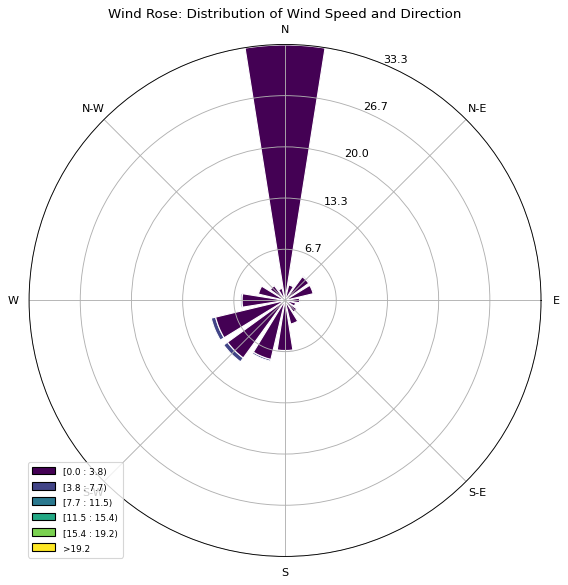

In [21]:
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose: Distribution of Wind Speed and Direction')
plt.show()

## Temperature Analysis: Examining the influence of RH on temperature

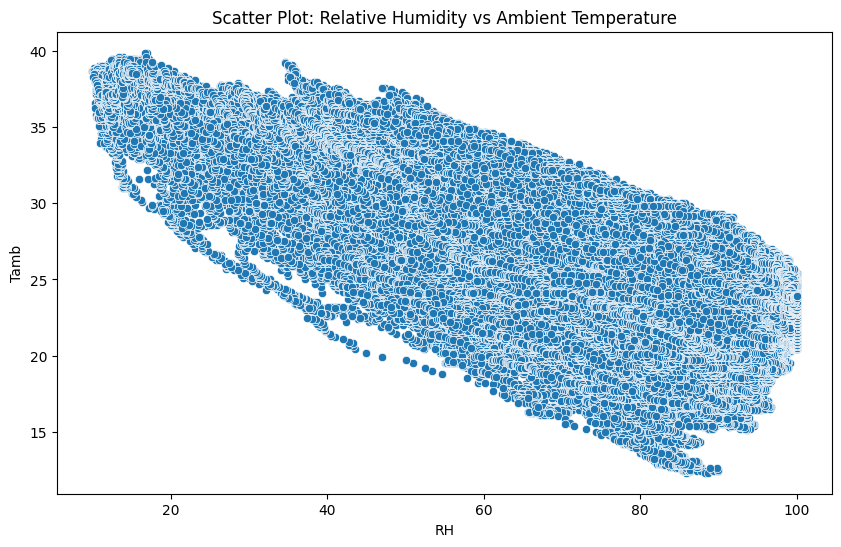

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='Tamb', data=data)
plt.title('Scatter Plot: Relative Humidity vs Ambient Temperature')
plt.show()

## Histograms for GHI, DNI, DHI, WS, and temperatures

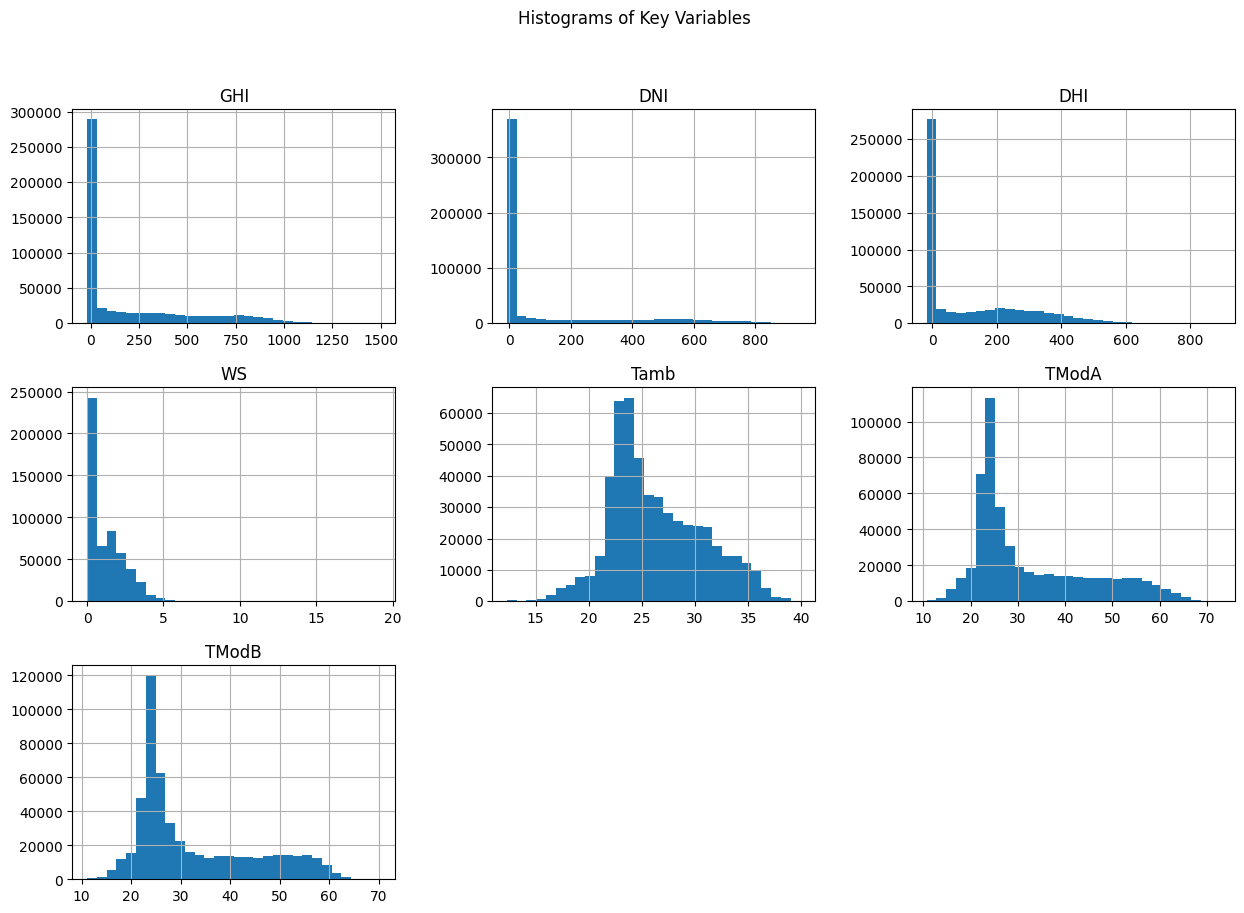

In [23]:
data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Key Variables')
plt.show()

## Z-Score Analysis

In [24]:
# Calculate Z-scores for GHI, DNI, DHI, Tamb
z_scores = data[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Outliers detected: {outliers.sum()} rows")

Outliers detected: 11740 rows


## Bubble chart for GHI vs Tamb vs WS with bubble size representing RH

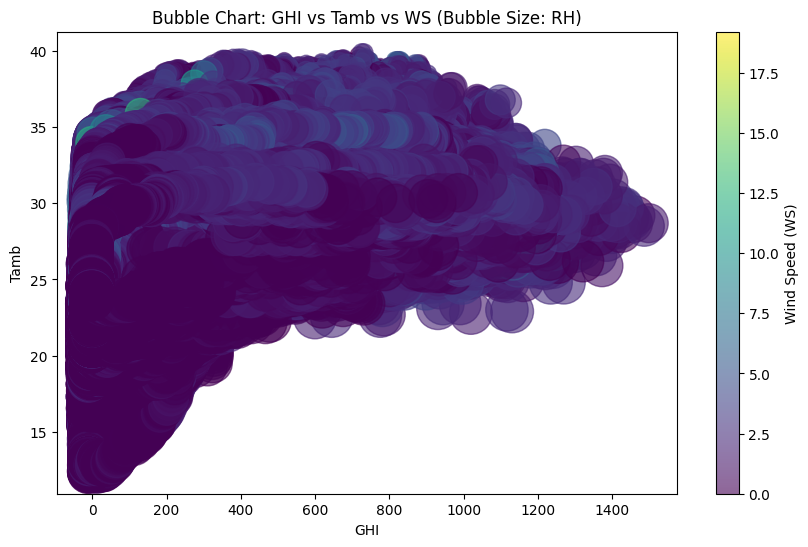

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GHI'], data['Tamb'], s=data['RH']*10, c=data['WS'], alpha=0.6, cmap='viridis')
plt.colorbar(label='Wind Speed (WS)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb vs WS (Bubble Size: RH)')
plt.show()

## Data Cleaning: Handling anomalies and missing values

In [26]:
# Fill missing values with mean or a suitable value
data.fillna(data.mean(), inplace=True)

# Drop columns with all null values like 'Comments'
data.drop(columns=['Comments'], inplace=True)

In [27]:
data.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
